In [192]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


In [194]:
df=pd.read_csv(r"D:\New Volume\Data Analysis\GroceryDataset.csv")

In [196]:
df

,Sub Category,Price,Discount,Rating,Title,Currency,Feature,Product Description
0,Bakery & Desserts,$56.99,No Discount,Rated 4.3 out of 5 stars based on 265 reviews.,"David’s Cookies Mile High Peanut Butter Cake, ...",$,"""10"""" Peanut Butter Cake\nCertified Kosher OU-...",A cake the dessert epicure will die for!Our To...
1,Bakery & Desserts,$159.99,No Discount,Rated 5 out of 5 stars based on 1 reviews.,"The Cake Bake Shop 8"" Round Carrot Cake (16-22...",$,Spiced Carrot Cake with Cream Cheese Frosting ...,"Due to the perishable nature of this item, ord..."
2,Bakery & Desserts,$44.99,No Discount,Rated 4.1 out of 5 stars based on 441 reviews.,"St Michel Madeleine, Classic French Sponge Cak...",$,100 count\nIndividually wrapped\nMade in and I...,Moist and buttery sponge cakes with the tradit...
3,Bakery & Desserts,$39.99,No Discount,Rated 4.7 out of 5 stars based on 9459 reviews.,"David's Cookies Butter Pecan Meltaways 32 oz, ...",$,Butter Pecan Meltaways\n32 oz 2-Pack\nNo Prese...,These delectable butter pecan meltaways are th...
4,Bakery & Desserts,$59.99,No Discount,Rated 4.5 out of 5 stars based on 758 reviews.,"David’s Cookies Premier Chocolate Cake, 7.2 lb...",$,"""10"" Four Layer Chocolate Cake\nCertified Kosh...",A cake the dessert epicure will die for!To the...
...,...,...,...,...,...,...,...,...
1752,Snacks,$23.99,No Discount,NaN,"Oberto Thin Style Smoked Sausage Stick, Cockta...",$,Cocktail Pepperoni Smoked Sausage Sticks 3...,Cocktail PepperoniSmoked Sausage Sticks3 oz ba...
1753,Snacks,$49.99,No Discount,NaN,"Cheetos Crunchy, Original, 2.1 oz, 64-count",$,Made with Real Cheese,64-count2.1 oz Bags
1754,Snacks,$22.99,No Discount,NaN,"Sabritas Chile & Limon Mix, Variety Pack, 30-c...",$,Chile & Limón Mix Variety Pack 30 ct Net...,8-Doritos Dinamita Chile Limón Flavored Rolled...
1755,Snacks,$17.49,No Discount,NaN,"Fruit Roll-Ups, Variety Pack, 72-count",$,Variety Pack 1 Box with 72 Rolls Flavore...,Fruit Flavored Snacks\nVariety Includes: Straw...


In [198]:
df.isnull().sum()

Sub Category              0
Price                     3
Discount                  0
Rating                 1075
Title                     0
Currency                  5
Feature                  18
Product Description      42
dtype: int64

In [200]:
df.columns

Index(['Sub Category', 'Price', 'Discount', 'Rating', 'Title', 'Currency',
       'Feature', 'Product Description'],
      dtype='object')

In [202]:
df['Rating'].unique()

array(['Rated 4.3 out of 5 stars based on 265 reviews.',
       'Rated 5 out of 5 stars based on 1 reviews.',
       'Rated 4.1 out of 5 stars based on 441 reviews.',
       'Rated 4.7 out of 5 stars based on 9459 reviews.',
       'Rated 4.5 out of 5 stars based on 758 reviews.',
       'Rated 4.4 out of 5 stars based on 369 reviews.',
       'Rated 4.7 out of 5 stars based on 2241 reviews.',
       'Rated 4.4 out of 5 stars based on 232 reviews.',
       'Rated 4.4 out of 5 stars based on 1679 reviews.',
       'Rated 5 out of 5 stars based on 2 reviews.',
       'Rated 4 out of 5 stars based on 357 reviews.',
       'Rated 3 out of 5 stars based on 1 reviews.',
       'Rated 4.7 out of 5 stars based on 273 reviews.',
       'Rated 4.6 out of 5 stars based on 369 reviews.',
       'Rated 4.6 out of 5 stars based on 133 reviews.',
       'Rated 4.5 out of 5 stars based on 452 reviews.', 'No Reviews',
       'Rated 4.2 out of 5 stars based on 85 reviews.',
       'Rated 1.5 out of 5 st

In [204]:
df['Title'].unique()

array(['David’s Cookies Mile High Peanut Butter Cake, 6.8 lbs (14 Servings)',
       'The Cake Bake Shop 8" Round Carrot Cake (16-22 Servings)',
       'St Michel Madeleine, Classic French Sponge Cake 100 - count', ...,
       'Sabritas Chile & Limon Mix, Variety Pack, 30-count',
       'Fruit Roll-Ups, Variety Pack, 72-count',
       'Takis, Rolled Tortilla Chips, Intense Nacho, 1 oz, 50-count'],
      dtype=object)

In [206]:
df['Feature'].unique()

array(['"10"" Peanut Butter Cake\nCertified Kosher OU-D\n14 Servings',
       'Spiced Carrot Cake with Cream Cheese Frosting   Silk Cherry Blossom Flowers (Not Edible)   No Nuts or Raisins   Dimensions: 9” Diameter, 7” High   16-22 Servings',
       '100 count\nIndividually wrapped\nMade in and Imported from France\nFree-range eggs\nNon-GMO ingredients',
       ..., 'Chile & Limón Mix   Variety Pack   30 ct   Net Weight 48 oz',
       'Variety Pack   1   Box with 72 Rolls   Flavored with Other Natural Flavors   Gelatin and Gluten Free',
       'Intense Nacho Cheese   Non-Spicy   1 oz bag, 50 count   Artificially Flavored'],
      dtype=object)

In [208]:
df['Product Description'].unique()

array(['A cake the dessert epicure will die for!Our Top Selling Cake! Fudge brownie base, layered in velvety smooth peanut butter mousse, rich chocolate cake, topped with brownie chunks, handful of peanut butter chips, drizzled in fudge. This cake is the thoughtful gift idea that’s perfect for family, friends, coworkers, or to anyone you care about in your life. -\tGenerously sized precut slices, a cake lover’s dreams come true! Includes:Measures 10” diameterWeighs in at 6.8 lbs.14 servings OU-D certified, the most trusted kosher certification in the U.S.All natural with no added preservativesSome of our products may contain nuts. Our facility is NOT a nut-free facility, and as a result it is possible that any product may have come in contact with nut or nut oils',
       "Due to the perishable nature of this item, orders do NOT ship over the weekend. Orders can only be delivered on Wednesday, Thursday and Friday. Minimum delivery time is 5 business days.   Plate not included.   Gwendo

In [210]:
df['Sub Category'].unique()

array(['Bakery & Desserts', 'Beverages & Water', 'Breakfast', 'Candy',
       'Cleaning Supplies', 'Coffee', 'Deli', 'Floral', 'Gift Baskets',
       'Household', 'Kirkland Signature Grocery',
       'Laundry Detergent & Supplies', 'Meat & Seafood', 'Organic',
       'Pantry & Dry Goods', 'Paper & Plastic Products', 'Poultry',
       'Seafood', 'Snacks'], dtype=object)

In [212]:
df['Price'].unique()

array(['$56.99 ', '$159.99 ', '$44.99 ', '$39.99 ', '$59.99 ', '$74.99 ',
       '$29.99 ', '$62.99 ', '$299.99 ', '$54.99 ', '$89.99 ', '$49.99 ',
       '$99.99 ', '$24.99 ', '$72.99 ', '$119.99 ', '$109.99 ', '$34.99 ',
       '$27.99 ', '$21.99 ', '$20.99 ', '$19.99 ', '$439.99 ', '$9.99 ',
       '$14.99 ', '$18.99 ', '$21.49 ', '$17.99 ', '$23.99 ', '$4.99 ',
       '$12.99 ', '$32.99 ', '$13.79 ', '$23.49 ', '$22.99 ', '$8.99 ',
       '$15.99 ', '$28.99 ', '$16.49 ', '$549.99 ', '$17.49 ', '$25.99 ',
       '$11.69 ', '$69.99 ', '$21.79 ', '$37.99 ', '$139.99 ', '$41.99 ',
       '$18.49 ', '$16.99 ', '$36.99 ', '$10.99 ', '$61.99 ', '$17.59 ',
       '$11.99 ', '$24.49 ', '$10.49 ', '$9.69 ', '$8.19 ', '$9.49 ',
       '$12.49 ', '$12.69 ', '$31.99 ', '$15.49 ', '$46.99 ', '$11.49 ',
       '$16.39 ', '$13.99 ', '$38.99 ', '$26.99 ', '$13.49 ', '$14.49 ',
       '$26.69 ', '$42.99 ', '$45.99 ', '$7.99 ', '$25.69 ', '$19.49 ',
       '$12.09 ', '$10.79 ', '$17.89 ', '$28.79 ', 

In [214]:
df['Discount'].unique()

array(['No Discount', 'After $30 OFF', 'After $5 OFF',
       'This item is not returnable.', 'After $20 OFF', 'After $4.50 OFF',
       'After $4 OFF', 'After $2.80 OFF', 'After $8 OFF',
       'After $3.60 OFF', 'After $3 OFF', 'After $1.50 OFF',
       'After $3.30 OFF', 'After $6 OFF', 'After $2.40 OFF',
       'After $2.20 OFF', 'After $12 OFF', 'After $3.10 OFF',
       'After $5.60 OFF', 'After $2.70 OFF', 'After $10 OFF',
       'After $9.30 OFF', 'After $50 OFF', 'After $2.50 OFF',
       'After $70 OFF', 'After $60 OFF', 'After $40 - $80 OFF',
       'After $40 - $70 OFF', 'After $40 OFF', 'After $80 OFF', '.',
       'After $3.50 OFF', 'Limit 1 Per Member', 'Limit 5 Per Member',
       'After $6.50 OFF', 'After $3.80 OFF', 'After $2.60 OFF',
       'After $7 OFF',
       'Costco Members Receive an Additional $5 OFF Caramel Peanut Protein Bars with FitCrunch through Costco Next',
       'After $4.10 OFF', 'After $2 OFF', 'After $2.30 OFF'], dtype=object)

In [216]:
import pandas as pd


# Function to clean and convert price
def clean_price(price):
    # Convert to string
    price = str(price)
    # Remove dollar sign, commas, and spaces
    price = price.replace('$', '').replace(',', '').replace(' ', '')
    
    # Handle ranges
    if 'through-' in price:
        prices = price.split('through-')
        # Take the average of the range
        price = (float(prices[0]) + float(prices[1])) / 2
    else:
        price = float(price)
    
    return price

# Apply the function to the 'price' column
df['Price ($)'] = df['Price'].apply(clean_price)

print(df)



           Sub Category     Price     Discount  \
0     Bakery & Desserts   $56.99   No Discount   
1     Bakery & Desserts  $159.99   No Discount   
2     Bakery & Desserts   $44.99   No Discount   
3     Bakery & Desserts   $39.99   No Discount   
4     Bakery & Desserts   $59.99   No Discount   
...                 ...       ...          ...   
1752             Snacks   $23.99   No Discount   
1753             Snacks   $49.99   No Discount   
1754             Snacks   $22.99   No Discount   
1755             Snacks   $17.49   No Discount   
1756             Snacks   $21.99   No Discount   

                                               Rating  \
0      Rated 4.3 out of 5 stars based on 265 reviews.   
1          Rated 5 out of 5 stars based on 1 reviews.   
2      Rated 4.1 out of 5 stars based on 441 reviews.   
3     Rated 4.7 out of 5 stars based on 9459 reviews.   
4      Rated 4.5 out of 5 stars based on 758 reviews.   
...                                               ...   


In [218]:
import pandas as pd


# Function to extract the rating
def extract_rating(rating):
    import re
    if isinstance(rating, float):
        return rating
    match = re.search(r'(\d+\.\d+|\d+) out of 5 stars', rating)
    if match:
        return float(match.group(1))
    return None

# Apply the function to the 'Rating' column
df['Rating'] = df['Rating'].apply(extract_rating)

print(df)


           Sub Category     Price     Discount  Rating  \
0     Bakery & Desserts   $56.99   No Discount     4.3   
1     Bakery & Desserts  $159.99   No Discount     5.0   
2     Bakery & Desserts   $44.99   No Discount     4.1   
3     Bakery & Desserts   $39.99   No Discount     4.7   
4     Bakery & Desserts   $59.99   No Discount     4.5   
...                 ...       ...          ...     ...   
1752             Snacks   $23.99   No Discount     NaN   
1753             Snacks   $49.99   No Discount     NaN   
1754             Snacks   $22.99   No Discount     NaN   
1755             Snacks   $17.49   No Discount     NaN   
1756             Snacks   $21.99   No Discount     NaN   

                                                  Title Currency  \
0     David’s Cookies Mile High Peanut Butter Cake, ...        $   
1     The Cake Bake Shop 8" Round Carrot Cake (16-22...        $   
2     St Michel Madeleine, Classic French Sponge Cak...        $   
3     David's Cookies Butter Pe

In [220]:
df

,Sub Category,Price,Discount,Rating,Title,Currency,Feature,Product Description,Price ($)
0,Bakery & Desserts,$56.99,No Discount,4.3,"David’s Cookies Mile High Peanut Butter Cake, ...",$,"""10"""" Peanut Butter Cake\nCertified Kosher OU-...",A cake the dessert epicure will die for!Our To...,56.99
1,Bakery & Desserts,$159.99,No Discount,5.0,"The Cake Bake Shop 8"" Round Carrot Cake (16-22...",$,Spiced Carrot Cake with Cream Cheese Frosting ...,"Due to the perishable nature of this item, ord...",159.99
2,Bakery & Desserts,$44.99,No Discount,4.1,"St Michel Madeleine, Classic French Sponge Cak...",$,100 count\nIndividually wrapped\nMade in and I...,Moist and buttery sponge cakes with the tradit...,44.99
3,Bakery & Desserts,$39.99,No Discount,4.7,"David's Cookies Butter Pecan Meltaways 32 oz, ...",$,Butter Pecan Meltaways\n32 oz 2-Pack\nNo Prese...,These delectable butter pecan meltaways are th...,39.99
4,Bakery & Desserts,$59.99,No Discount,4.5,"David’s Cookies Premier Chocolate Cake, 7.2 lb...",$,"""10"" Four Layer Chocolate Cake\nCertified Kosh...",A cake the dessert epicure will die for!To the...,59.99
...,...,...,...,...,...,...,...,...,...
1752,Snacks,$23.99,No Discount,NaN,"Oberto Thin Style Smoked Sausage Stick, Cockta...",$,Cocktail Pepperoni Smoked Sausage Sticks 3...,Cocktail PepperoniSmoked Sausage Sticks3 oz ba...,23.99
1753,Snacks,$49.99,No Discount,NaN,"Cheetos Crunchy, Original, 2.1 oz, 64-count",$,Made with Real Cheese,64-count2.1 oz Bags,49.99
1754,Snacks,$22.99,No Discount,NaN,"Sabritas Chile & Limon Mix, Variety Pack, 30-c...",$,Chile & Limón Mix Variety Pack 30 ct Net...,8-Doritos Dinamita Chile Limón Flavored Rolled...,22.99
1755,Snacks,$17.49,No Discount,NaN,"Fruit Roll-Ups, Variety Pack, 72-count",$,Variety Pack 1 Box with 72 Rolls Flavore...,Fruit Flavored Snacks\nVariety Includes: Straw...,17.49


In [222]:
import pandas as pd


# Function to map discount descriptions to numerical values
def map_discount(discount):
    if discount == 'No Discount':
        return 0
    elif 'After $' in discount:
        return float(discount.split('$')[1].split(' ')[0])
    elif 'Limit' in discount:
        return int(discount.split(' ')[1])
    elif 'Additional $' in discount:
        return float(discount.split('$')[1].split(' ')[0])
    else:
        return None

# Apply the function to the 'Discount' column
df['Discount Amount ($)'] = df['Discount'].apply(map_discount)

print(df)


           Sub Category     Price     Discount  Rating  \
0     Bakery & Desserts   $56.99   No Discount     4.3   
1     Bakery & Desserts  $159.99   No Discount     5.0   
2     Bakery & Desserts   $44.99   No Discount     4.1   
3     Bakery & Desserts   $39.99   No Discount     4.7   
4     Bakery & Desserts   $59.99   No Discount     4.5   
...                 ...       ...          ...     ...   
1752             Snacks   $23.99   No Discount     NaN   
1753             Snacks   $49.99   No Discount     NaN   
1754             Snacks   $22.99   No Discount     NaN   
1755             Snacks   $17.49   No Discount     NaN   
1756             Snacks   $21.99   No Discount     NaN   

                                                  Title Currency  \
0     David’s Cookies Mile High Peanut Butter Cake, ...        $   
1     The Cake Bake Shop 8" Round Carrot Cake (16-22...        $   
2     St Michel Madeleine, Classic French Sponge Cak...        $   
3     David's Cookies Butter Pe

In [224]:
df = df.drop(columns=['Title','Price', 'Discount','Currency','Feature','Product Description'])

In [226]:
df

,Sub Category,Rating,Price ($),Discount Amount ($)
0,Bakery & Desserts,4.3,56.99,0.0
1,Bakery & Desserts,5.0,159.99,0.0
2,Bakery & Desserts,4.1,44.99,0.0
3,Bakery & Desserts,4.7,39.99,0.0
4,Bakery & Desserts,4.5,59.99,0.0
...,...,...,...,...
1752,Snacks,NaN,23.99,0.0
1753,Snacks,NaN,49.99,0.0
1754,Snacks,NaN,22.99,0.0
1755,Snacks,NaN,17.49,0.0


In [228]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the 'Sub Category' column
encoded_features = encoder.fit_transform(df[['Sub Category']])

# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Sub Category']))

# Concatenate the original DataFrame with the encoded features
df_encoded = pd.concat([df, encoded_df], axis=1)

# Drop the original 'Sub Category' column
df_encoded = df_encoded.drop(columns=['Sub Category'])

print(df_encoded)



      Rating  Price ($)  Discount Amount ($)  Sub Category_Bakery & Desserts  \
0        4.3      56.99                  0.0                             1.0   
1        5.0     159.99                  0.0                             1.0   
2        4.1      44.99                  0.0                             1.0   
3        4.7      39.99                  0.0                             1.0   
4        4.5      59.99                  0.0                             1.0   
...      ...        ...                  ...                             ...   
1752     NaN      23.99                  0.0                             0.0   
1753     NaN      49.99                  0.0                             0.0   
1754     NaN      22.99                  0.0                             0.0   
1755     NaN      17.49                  0.0                             0.0   
1756     NaN      21.99                  0.0                             0.0   

      Sub Category_Beverages & Water  S

In [230]:
df_encoded

,Rating,Price ($),Discount Amount ($),Sub Category_Bakery & Desserts,Sub Category_Beverages & Water,Sub Category_Breakfast,Sub Category_Candy,Sub Category_Cleaning Supplies,Sub Category_Coffee,Sub Category_Deli,...,Sub Category_Household,Sub Category_Kirkland Signature Grocery,Sub Category_Laundry Detergent & Supplies,Sub Category_Meat & Seafood,Sub Category_Organic,Sub Category_Pantry & Dry Goods,Sub Category_Paper & Plastic Products,Sub Category_Poultry,Sub Category_Seafood,Sub Category_Snacks
0,4.3,56.99,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.0,159.99,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.1,44.99,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.7,39.99,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.5,59.99,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,NaN,23.99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1753,NaN,49.99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1754,NaN,22.99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1755,NaN,17.49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [232]:
df_encoded.isnull().sum()

Rating                                       1140
Price ($)                                       3
Discount Amount ($)                             3
Sub Category_Bakery & Desserts                  0
Sub Category_Beverages & Water                  0
Sub Category_Breakfast                          0
Sub Category_Candy                              0
Sub Category_Cleaning Supplies                  0
Sub Category_Coffee                             0
Sub Category_Deli                               0
Sub Category_Floral                             0
Sub Category_Gift Baskets                       0
Sub Category_Household                          0
Sub Category_Kirkland Signature Grocery         0
Sub Category_Laundry Detergent & Supplies       0
Sub Category_Meat & Seafood                     0
Sub Category_Organic                            0
Sub Category_Pantry & Dry Goods                 0
Sub Category_Paper & Plastic Products           0
Sub Category_Poultry                            0


In [234]:
df_cleaned = df_encoded.dropna()
print(df_cleaned)

      Rating  Price ($)  Discount Amount ($)  Sub Category_Bakery & Desserts  \
0        4.3      56.99                  0.0                             1.0   
1        5.0     159.99                  0.0                             1.0   
2        4.1      44.99                  0.0                             1.0   
3        4.7      39.99                  0.0                             1.0   
4        4.5      59.99                  0.0                             1.0   
...      ...        ...                  ...                             ...   
1716     4.8      56.99                  0.0                             0.0   
1717     3.2      59.99                  0.0                             0.0   
1725     4.6      54.99                  0.0                             0.0   
1740     4.4      39.99                  0.0                             0.0   
1746     4.6      32.99                  0.0                             0.0   

      Sub Category_Beverages & Water  S

In [236]:
df_cleaned.isnull().sum()

Rating                                       0
Price ($)                                    0
Discount Amount ($)                          0
Sub Category_Bakery & Desserts               0
Sub Category_Beverages & Water               0
Sub Category_Breakfast                       0
Sub Category_Candy                           0
Sub Category_Cleaning Supplies               0
Sub Category_Coffee                          0
Sub Category_Deli                            0
Sub Category_Floral                          0
Sub Category_Gift Baskets                    0
Sub Category_Household                       0
Sub Category_Kirkland Signature Grocery      0
Sub Category_Laundry Detergent & Supplies    0
Sub Category_Meat & Seafood                  0
Sub Category_Organic                         0
Sub Category_Pantry & Dry Goods              0
Sub Category_Paper & Plastic Products        0
Sub Category_Poultry                         0
Sub Category_Seafood                         0
Sub Category_

In [238]:
df_cleaned.shape

(614, 22)

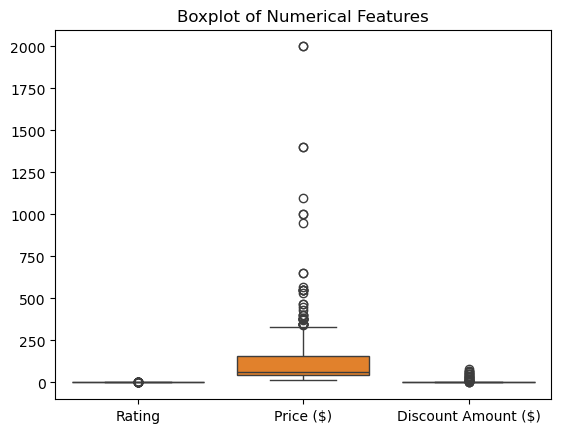

In [240]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df_cleaned[['Rating', 'Price ($)', 'Discount Amount ($)']])
plt.title('Boxplot of Numerical Features')
plt.show()


In [242]:
# Keep rows where "Price" is within the bounds
df_cleaned = df_cleaned[(df_cleaned['Price ($)'] <= 800)]


In [244]:
df_cleaned.columns

Index(['Rating', 'Price ($)', 'Discount Amount ($)',
       'Sub Category_Bakery & Desserts', 'Sub Category_Beverages & Water',
       'Sub Category_Breakfast', 'Sub Category_Candy',
       'Sub Category_Cleaning Supplies', 'Sub Category_Coffee',
       'Sub Category_Deli', 'Sub Category_Floral', 'Sub Category_Gift Baskets',
       'Sub Category_Household', 'Sub Category_Kirkland Signature Grocery',
       'Sub Category_Laundry Detergent & Supplies',
       'Sub Category_Meat & Seafood', 'Sub Category_Organic',
       'Sub Category_Pantry & Dry Goods',
       'Sub Category_Paper & Plastic Products', 'Sub Category_Poultry',
       'Sub Category_Seafood', 'Sub Category_Snacks'],
      dtype='object')

In [246]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


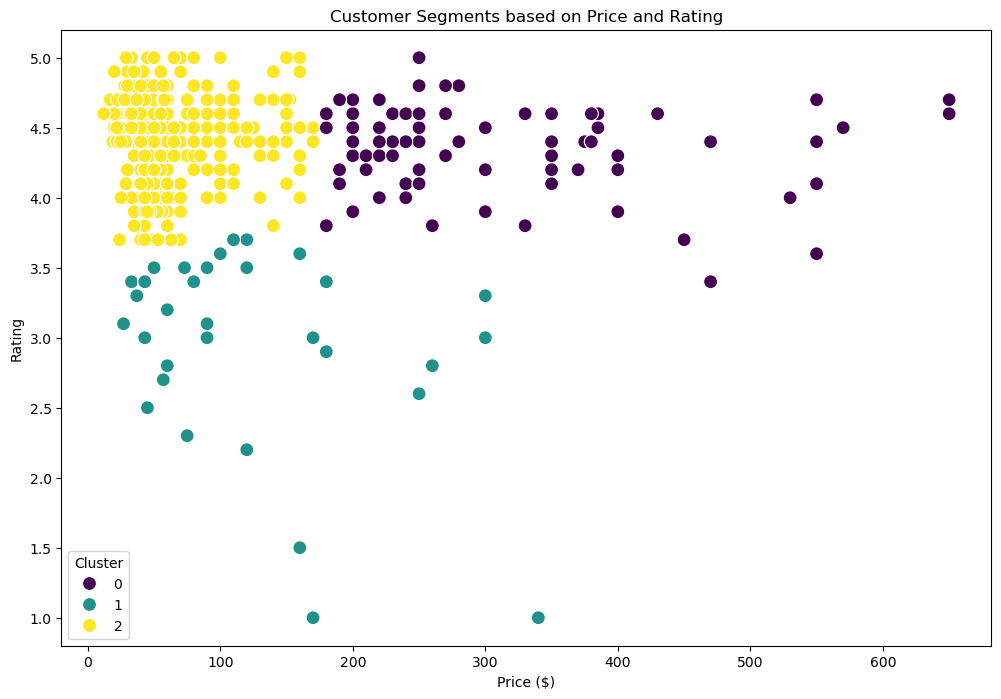

In [248]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming `df_cleaned` is your cleaned DataFrame with the relevant features

# Selecting features for clustering
features = df_cleaned[['Price ($)', 'Rating']]

# Scaling the features (important for K-Means)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Applying K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Change n_clusters as needed
df_cleaned['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualizing the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=features['Price ($)'],
    y=features['Rating'],
    hue=df_cleaned['Cluster'],
    palette='viridis',
    s=100
)
plt.title('Customer Segments based on Price and Rating')
plt.xlabel('Price ($)')
plt.ylabel('Rating')
plt.legend(title='Cluster')
plt.show()
